# <b> Introduction to Tensors

In [2]:
import tensorflow as tf
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG>LEVEL'] = '2'

+ Tensors are multi-dimensional arrays with a uniform type (called a `dtype`).  You can all supported `dtypes` at `tf.dtypes.DType`.

## <b> Basics<b>


Here is a "scalar" or "rank-0" tensor . A scalar contains a single value, and no "axes".

In [4]:
# This will be an int32 tensor by default
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


A "vector" or "rank-1" tensor is like a list of values. A vector has one axis:

In [5]:
# Let's make a float tensor
rank_1_tensor = tf.constant([2.0, 3.0, 4.0])
print(rank_1_tensor)

tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)


A "matrix" or "rank-2" tensor has two axes:

In [7]:
# If you eant to be specific, you can set the dtype during the creation time
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank_2_tensor)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


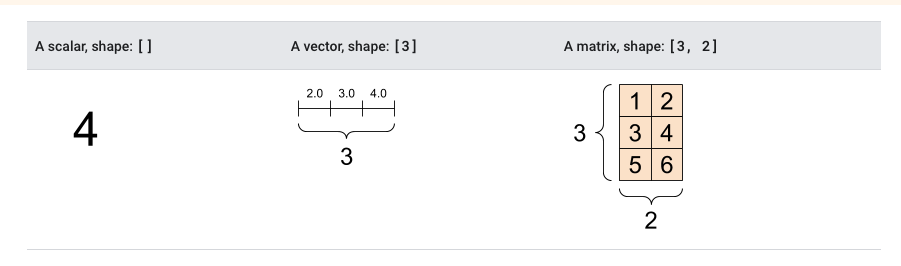


Tensors may have more axes; here is a tensor with three axes:

In [9]:
# There can arbitraty number of axes aka dimensions
rank_3_tensor = tf.constant([
    [[0, 1, 2, 3, 4],
     [5, 6, 7, 8, 9]],
    [[10, 11, 12, 13, 14],
     [15, 16, 17, 18, 19]],
    [[20, 21, 22, 23, 24],
     [25, 26, 27, 28, 29]],])
    
print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


There are many ways you might visualize a tensor with more than two axes.

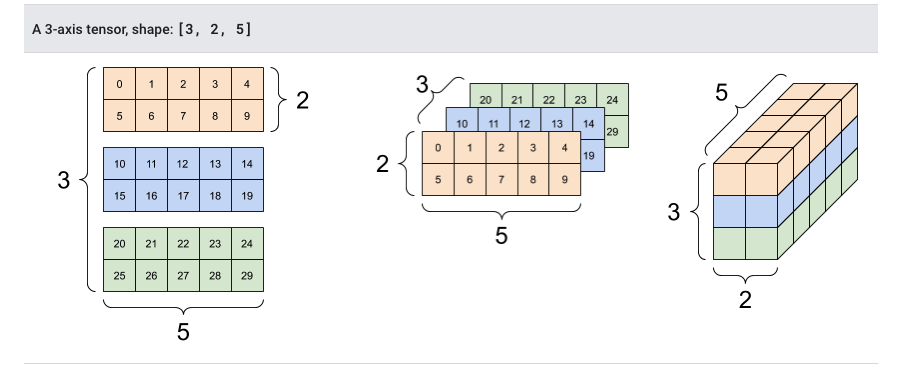

<!-- <table>
<tr>
  <th colspan=3>A 3-axis tensor, shape: <code>[3, 2, 5]</code></th>
<tr>
<tr>
  <td>
   <img src="images/tensor/3-axis_numpy.png"/>
  </td>
  <td>
   <img src="images/tensor/3-axis_front.png"/>
  </td>

  <td>
   <img src="images/tensor/3-axis_block.png"/>
  </td>
</tr>

</table> -->

Conversion: `np.array` or the `tensor.numpy`

In [10]:
# First way
np.array(rank_2_tensor)

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

In [11]:
rank_2_tensor.numpy()

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

Tensors can have many other types like:

* complex numbers
* strings

The base Tensor class is `tf.Tensor` while there are specialized types of tensors that can handle different shapes as well

* Ragged tensors (see [RaggedTensor](#ragged_tensors) below)
* Sparse tensors (see [SparseTensor](#sparse_tensors) below)

You can do basic math on tensors, including addition, element-wise multiplication, and matrix multiplication.

In [15]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]]) # could have said tf.ones([2, 2])

print(tf.add(a, b), '\n')
print(tf.multiply(a, b), '\n')
print(tf.matmul(a, b), '\n')

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [16]:
print(a + b, '\n') # element-wise addition
print(a * b, '\n') # element-wise multiplication
print(a @ b, '\n') # matrix multiplication

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



Tensors are used in all kinds of operations.

In [17]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])
                 
# Largest Value
print(tf.reduce_max(c))
# Find index of the largest value
print(tf.math.argmax(c))
# Compute the softmax
print(tf.nn.softmax(c))

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor(
[[2.6894143e-01 7.3105860e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)


Note: Typically, anywhere a TensorFlow function expects a `Tensor` as input, the function will also accept anything that can be converted to a `Tensor` using `tf.convert_to_tensor`. See below for an example.

In [18]:
tf.convert_to_tensor([1, 2, 3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [19]:
tf.reduce_max([1, 2, 3])

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [20]:
tf.reduce_max(np.array([1, 2, 3]))

<tf.Tensor: shape=(), dtype=int64, numpy=3>

## <b> About shapes

Tensors have shapes:

* **Shape**: The length (number of elements) of each of the axes of a tensor.
* **Rank**: Number of tensor axes.  A scalar has rank 0, a vector has rank 1, a matrix is rank 2.
* **Axis** or **Dimension**: A particular dimension of a tensor.
* **Size**: The total number of items in the tensor, the product of the shape vector's elements.


In [21]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])

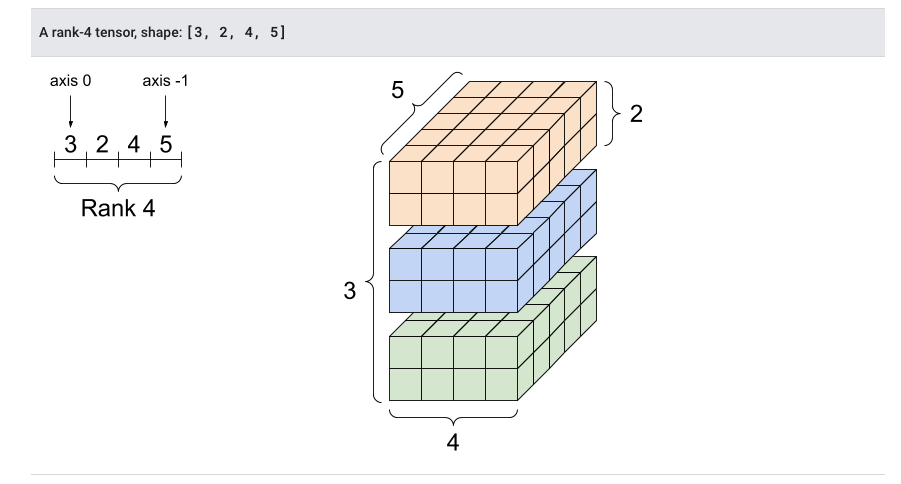
<!-- <table>
<tr>
  <th colspan=2>A rank-4 tensor, shape: <code>[3, 2, 4, 5]</code></th>
</tr>
<tr>
  <td>
<img src="images/tensor/shape.png" alt="A tensor shape is like a vector.">
    <td>
<img src="images/tensor/4-axis_block.png" alt="A 4-axis tensor">
  </td>
  </tr>
</table> -->


In [25]:
print('Type of every element:', rank_4_tensor.dtype)
print('Number of axes:', rank_4_tensor.ndim)
print('Shape of tensor:', rank_4_tensor.shape)
print('Elements along axis 0 of tensor:', rank_4_tensor.shape[0])
print('Elements along the last axis of tensor:', rank_4_tensor.shape[-1])
print('Total number of elements (3*2*4*5):', tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of axes: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5): 120


But note that the `Tensor.ndim` and `Tensor.shape` attributes don't return `Tensor` objects. If you need a `Tensor` use the `tf.rank` or `tf.shape` function. This difference is subtle, but it can be important when building graphs (later).

In [26]:
tf.rank(rank_4_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [27]:
tf.shape(rank_4_tensor)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([3, 2, 4, 5], dtype=int32)>

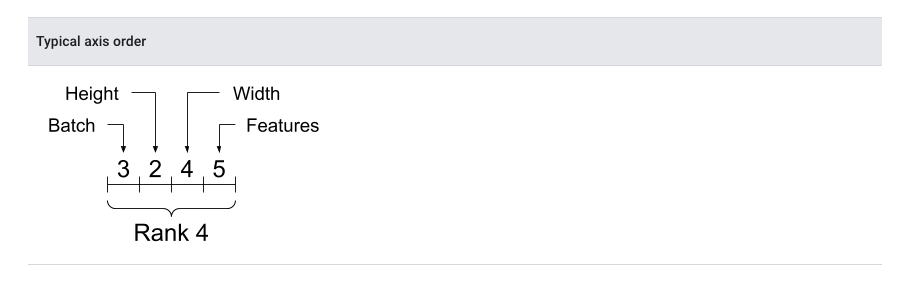

<!-- <table>
<tr>
<th>Typical axis order</th>
</tr>
<tr>
    <td>
<img src="images/tensor/shape2.png" alt="Keep track of what each axis is. A 4-axis tensor might be: Batch, Width, Height, Features">
  </td>
</tr>
</table> -->

# <b> Indexing

### Single-axis indexing

In [28]:
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())

[ 0  1  1  2  3  5  8 13 21 34]


Indexing with a scalar removes the axis:

In [29]:
print('First:', rank_1_tensor[0].numpy())
print('Second:', rank_1_tensor[1].numpy())
print('Last:', rank_1_tensor[-1].numpy())


First: 0
Second: 1
Last: 34


Indexing with a `:` slice keeps the axis:

In [32]:
print('Everything:', rank_1_tensor[:].numpy())
print('Before 5:', rank_1_tensor[:5].numpy())
print('From 4 to the end:', rank_1_tensor[4:].numpy())
print('From 2 but before 7:', rank_1_tensor[2:7].numpy())
print('Every oher item:', rank_1_tensor[::2].numpy()) # [start:end:step]
print('Reversed:', rank_1_tensor[::-1].numpy())

Everything: [ 0  1  1  2  3  5  8 13 21 34]
Before 5: [0 1 1 2 3]
From 4 to the end: [ 3  5  8 13 21 34]
From 2 but before 7: [1 2 3 5 8]
Every oher item: [ 0  1  3  8 21]
Reversed: [34 21 13  8  5  3  2  1  1  0]


# <b> Multi-axis indexing

In [34]:
print(rank_2_tensor.numpy())

[[1. 2.]
 [3. 4.]
 [5. 6.]]


Passing an integer for each index, the result is a scalar.

In [35]:
# Pull out a single from 2-rank tensor
print(rank_2_tensor[0, 0].numpy())

1.0


You can index using any combination of integers and slices:

In [36]:
# Get row and column tensors
print('Second row:', rank_2_tensor[1,:].numpy())
print('Second column:', rank_2_tensor[:, 1].numpy())
print('Last row:', rank_2_tensor[-1,:].numpy())
print('First item in last column:', rank_2_tensor[0, -1].numpy())
print('Skip the first row:')
print(rank_2_tensor[1:, :].numpy(), '\n')

Second row: [3. 4.]
Second column: [2. 4. 6.]
Last row: [5. 6.]
First item in last column: 2.0
Skip the first row:
[[3. 4.]
 [5. 6.]] 



Here is an example with a 3-axis tensor:

In [37]:
print(rank_3_tensor[:, :, 4])

tf.Tensor(
[[ 4  9]
 [14 19]
 [24 29]], shape=(3, 2), dtype=int32)


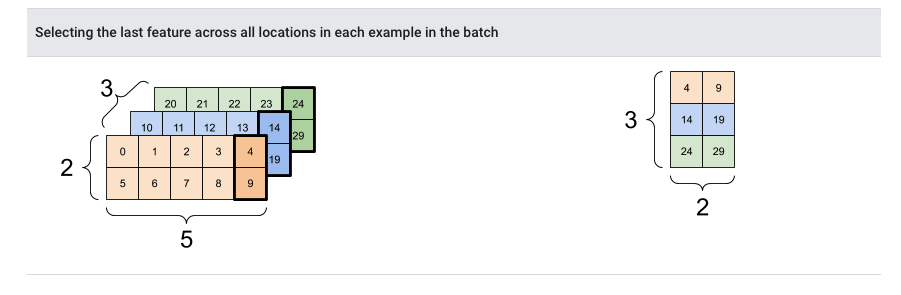

<!-- <table>
<tr>
<th colspan=2>Selecting the last feature across all locations in each example in the batch </th>
</tr>
<tr>
    <td>
<img src="images/tensor/index1.png" alt="A 3x2x5 tensor with all the values at the index-4 of the last axis selected.">
  </td>
      <td>
<img src="images/tensor/index2.png" alt="The selected values packed into a 2-axis tensor.">
  </td>
</tr>
</table> -->

Read the [tensor slicing guide](https://tensorflow.org/guide/tensor_slicing) to learn how you can apply indexing to manipulate individual elements in your tensors.

## Manipulating Shapes

Reshaping a tensor is of great utility. 


In [38]:
# Shape return a 'TensorShape' object that shows the size along each axis
x = tf.constant([[1], [2], [3]])
print(x.shape)

(3, 1)


In [39]:
# We can convert this object to Python list, too
print(x.shape.as_list())

[3, 1]


You can reshape a tensor into a new shape.

In [41]:
# We can reshape a tensor to a new shape
# Note that you'll pass it in a list
reshaped = tf.reshape(x, [1, 3])

In [42]:
print(x.shape)
print(reshaped.shape)

(3, 1)
(1, 3)


The data maintains its layout in memory and a new tensor is created, with the requested shape, pointing to the same data.

In [43]:
print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


If you flatten a tensor you can see what order it is laid out in memory.

In [45]:
# If a '-1' is passed in shape argument it says 'Whatever fits'
print(tf.reshape(rank_3_tensor, [-1]))

tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)


Reasonable use of `tf.reshape` is to combine or split adjacent axes (or add/remove `1`s).


In [47]:
print(tf.reshape(rank_3_tensor, [3*2, 5]), '\n')
print(tf.reshape(rank_3_tensor, [3, -1])) # can be [3, 2*5]

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]], shape=(3, 10), dtype=int32)


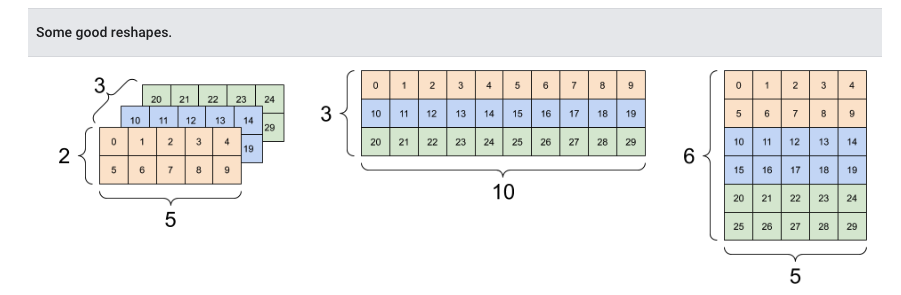

<!-- <table>
<th colspan=3>
Some good reshapes.
</th>
<tr>
  <td>
<img src="images/tensor/reshape-before.png" alt="A 3x2x5 tensor">
  </td>
  <td>
  <img src="images/tensor/reshape-good1.png" alt="The same data reshaped to (3x2)x5">
  </td>
  <td>
<img src="images/tensor/reshape-good2.png" alt="The same data reshaped to 3x(2x5)">
  </td>
</tr>
</table> -->


Reshaping will "work" for any new shape with the same total number of elements, but it will not do anything useful if you do not respect the order of the axes.

Swapping axes in `tf.reshape` does not work; you need `tf.transpose` for that. 


In [48]:
# Bad examples: don't do this

# You can't reorder axes with reshape
print(tf.reshape(rank_3_tensor, [2, 3, 5]), '\n')

# This a mess
print(tf.reshape(rank_3_tensor, [6, 5]), '\n')

# This doesn't work as well
try: 
    tf.reshape(rank_3_tensor, [7, -1])
except Exception as e:
    print(f'{type(e).__name__}: {e}')

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]], shape=(2, 3, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 

InvalidArgumentError: {{function_node __wrapped__Reshape_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input to reshape is a tensor with 30 values, but the requested shape requires a multiple of 7 [Op:Reshape]


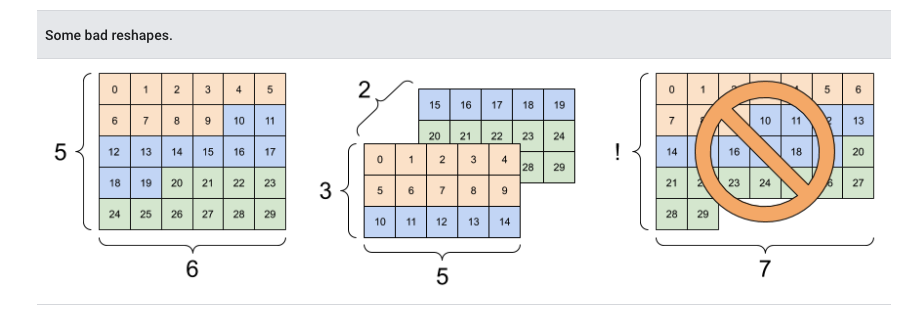

<!-- <table>
<th colspan=3>
Some bad reshapes.
</th>
<tr>
  <td>
<img src="images/tensor/reshape-bad.png" alt="You can't reorder axes, use tf.transpose for that">
  </td>
  <td>
<img src="images/tensor/reshape-bad4.png" alt="Anything that mixes the slices of data together is probably wrong.">
  </td>
  <td>
<img src="images/tensor/reshape-bad2.png" alt="The new shape must fit exactly.">
  </td>
</tr>
</table> -->

## More on `DTypes`

To inspect a `tf.Tensor`'s data type use the `Tensor.dtype` property.

When creating a `tf.Tensor` from a Python object you may optionally specify the datatype.

You can also cast from type to type.

In [53]:
the_64_tensor = tf.constant([2.2, 3.3, 4.4], dtype=tf.float64)
the_16_tensor = tf.cast(the_64_tensor, dtype=tf.float16)
# Now let's cast to uint8 and lose decimals
the_u8_tensor = tf.cast(the_16_tensor, dtype=tf.uint8)
print(the_u8_tensor)

tf.Tensor([2 3 4], shape=(3,), dtype=uint8)


## Broadcasting

Broadcasting is a concept borrowed from the NumPy.  In short,smaller tensors are "stretched" automatically to fit larger tensors when running combined operations on them.

The simplest and most common case is when you attempt to multiply or add a tensor to a scalar.  In that case, the scalar is broadcast to be the same shape as the other argument. 

In [54]:
x = tf.constant([1, 2, 3])
y = tf.constant(2)
z = tf.constant([2, 2, 2])
# All of these are the same computation
print(tf.multiply(x, 2))
print(x * y)
print(x * z)

tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)


In the case of a 3x1 matrix is element-wise multiplied by a 1x4 matrix to produce a 3x4 matrix. Note how the leading 1 is optional: The shape of y is `[4]`.

In [56]:
# These are the same computations
x = tf.reshape(x, [3, 1])
y = tf.range(1, 5)
print(x)
print(y)
print(tf.multiply(x, y))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32)
tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


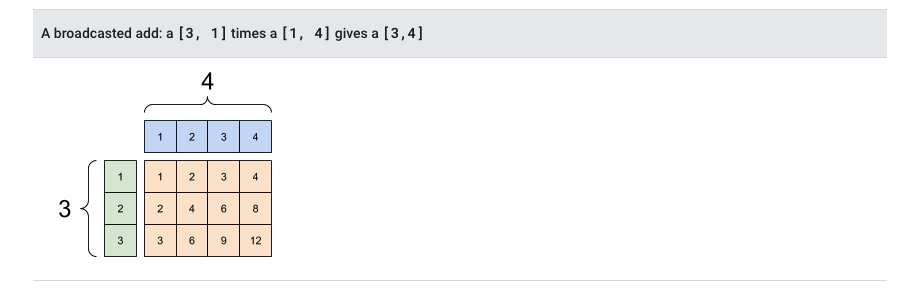

<!-- <table>
<tr>
  <th>A broadcasted add: a <code>[3, 1]</code> times a <code>[1, 4]</code> gives a <code>[3,4]</code> </th>
</tr>
<tr>
  <td>
<img src="images/tensor/broadcasting.png" alt="Adding a 3x1 matrix to a 4x1 matrix results in a 3x4 matrix">
  </td>
</tr>
</table>
 -->

In [59]:
# Here is the same operation without broadcasting

x_stretch = tf.constant([[1, 1, 1, 1],
                        [2, 2, 2, 2],
                        [3, 3, 3, 3]])

y_stretch = tf.constant([[1, 2, 3, 4],
                         [1, 2, 3, 4],
                         [1, 2, 3, 4]])

print(x_stretch * y_stretch)

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


Most of the time, broadcasting is both time and space efficient, as the broadcast operation never materializes the expanded tensors in memory.  

You see what broadcasting looks like using `tf.broadcast_to`.

In [61]:
print(tf.broadcast_to(tf.constant([1, 2, 3]), [3, 3]))

tf.Tensor(
[[1 2 3]
 [1 2 3]
 [1 2 3]], shape=(3, 3), dtype=int32)


[This section](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html) of Jake VanderPlas's book _Python Data Science Handbook_ shows more broadcasting tricks (again in NumPy).

## tf.convert_to_tensor

Most ops, like `tf.matmul` and `tf.reshape` take arguments of class `tf.Tensor`.  However, you'll notice in the above case, Python objects shaped like tensors are accepted.

Most, but not all, ops call `convert_to_tensor` on non-tensor arguments.  There is a registry of conversions, and most object classes like NumPy's `ndarray`, `TensorShape`, Python lists, and `tf.Variable` will all convert automatically.

## Ragged Tensors

A tensor with variable numbers of elements along some axis is called "ragged". Use `tf.ragged.RaggedTensor` for ragged data.

For example, This cannot be represented as a regular tensor:

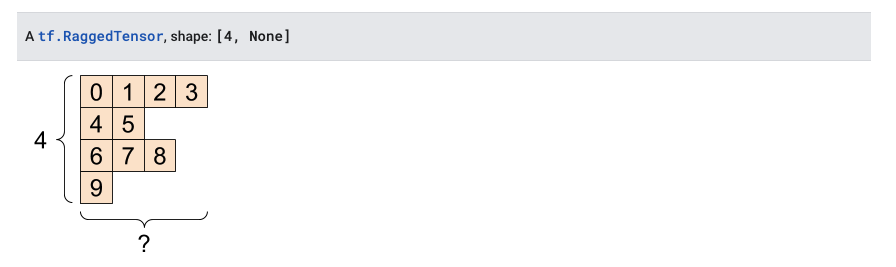
<!-- <table>
<tr>
  <th>A `tf.RaggedTensor`, shape: <code>[4, None]</code></th>
</tr>
<tr>
  <td>
<img src="images/tensor/ragged.png" alt="A 2-axis ragged tensor, each row can have a different length.">
  </td>
</tr>
</table> -->

In [62]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

In [63]:
try:
    tensor = tf.constant(ragged_list)
except Exception as e:
    print(f'{type(e).__name__}: {e}')

ValueError: Can't convert non-rectangular Python sequence to Tensor.


Instead create a `tf.RaggedTensor` using `tf.ragged.constant`:

In [65]:
ragged_tensor = tf.ragged.constant(ragged_list)
print(ragged_tensor)

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>


The shape of a `tf.RaggedTensor` will contain some axes with unknown lengths:

In [67]:
print(ragged_tensor.shape)

(4, None)


## String tensors

`tf.string` is a `dtype`, which is to say you can represent data as strings (variable-length byte arrays) in tensors.

The strings cannot be indexed the way Python strings are. The length of the string is not one of the axes of the tensor. See `tf.strings` for functions to manipulate them.

Here is a scalar string tensor:

In [69]:
# Tensors can be strings
scalar_string_tensor = tf.constant('Gray wolf')
print(scalar_string_tensor)

tf.Tensor(b'Gray wolf', shape=(), dtype=string)


And a vector of strings:

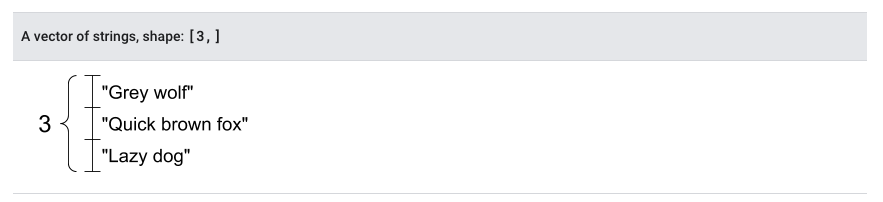

<!-- <table>
<tr>
  <th>A vector of strings, shape: <code>[3,]</code></th>
</tr>
<tr>
  <td>
<img src="images/tensor/strings.png" alt="The string length is not one of the tensor's axes.">
  </td>
</tr>
</table> -->

In [71]:
# If you have three string tensors of different lengths. It should be ok
tensor_of_strings = tf.constant(['Gray wolf',
                                'Quick brown fox',
                                'Lazy dog'])
#The shape is (3,) and string length is not included.
print(tensor_of_strings)

tf.Tensor([b'Gray wolf' b'Quick brown fox' b'Lazy dog'], shape=(3,), dtype=string)


In the above printout the `b` prefix indicates that `tf.string` dtype is not a unicode string, but a byte-string.

If you pass unicode characters they are utf-8 encoded.

In [73]:
tf.constant("🥳👍")

<tf.Tensor: shape=(), dtype=string, numpy=b'\xf0\x9f\xa5\xb3\xf0\x9f\x91\x8d'>

Some basic functions with strings can be found in `tf.strings`, including `tf.strings.split`.

In [76]:
# You can split to split a string into set oftensors
print(tf.strings.split(scalar_string_tensor, sep=' '))

tf.Tensor([b'Gray' b'wolf'], shape=(2,), dtype=string)


In [79]:
# but it turns into RaggedTensor if you split tensor of strings
# as each string might be split into different number of parts
print(tf.strings.split(tensor_of_strings))

<tf.RaggedTensor [[b'Gray', b'wolf'], [b'Quick', b'brown', b'fox'], [b'Lazy', b'dog']]>


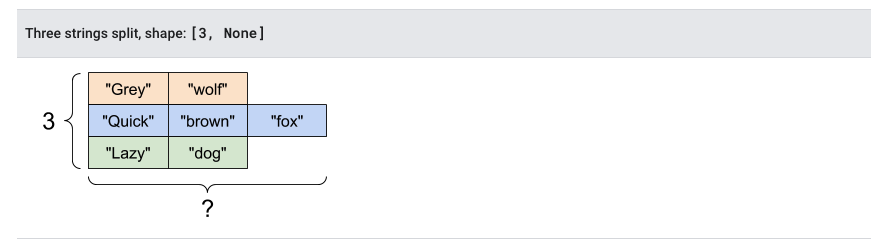

<!-- <table>
<tr>
  <th>Three strings split, shape: <code>[3, None]</code></th>
</tr>
<tr>
  <td>
<img src="images/tensor/string-split.png" alt="Splitting multiple strings returns a tf.RaggedTensor">
  </td>
</tr>
</table> -->

And `tf.string.to_number`:

In [81]:
text = tf.constant('1 10 100')
print(tf.strings.to_number(tf.strings.split(text, '')))

tf.Tensor([  1.  10. 100.], shape=(3,), dtype=float32)


Although you can't use `tf.cast` to turn a string tensor into numbers, you can convert it into bytes, and then into numbers.

In [83]:
byte_strings = tf.strings.bytes_split(tf.constant('Duck'))
byte_ints = tf.io.decode_raw(tf.constant('Duck'), tf.uint8)
print('Byte strings:', byte_strings)
print('Bytes:', byte_ints)

Byte strings: tf.Tensor([b'D' b'u' b'c' b'k'], shape=(4,), dtype=string)
Bytes: tf.Tensor([ 68 117  99 107], shape=(4,), dtype=uint8)


In [86]:
# Or split it up unicode and then decode it 
unicode_bytes = tf.constant("アヒル 🦆")
unicode_char_bytes = tf.strings.unicode_split(unicode_bytes, 'UTF-8')
unicode_values = tf.strings.unicode_decode(unicode_bytes, 'UTF-8')

print('\nUnicode bytes:', unicode_bytes)
print('\nUnicode character bytes:', unicode_char_bytes)
print('\nUnicode values:', unicode_values)


Unicode bytes: tf.Tensor(b'\xe3\x82\xa2\xe3\x83\x92\xe3\x83\xab \xf0\x9f\xa6\x86', shape=(), dtype=string)

Unicode character bytes: tf.Tensor([b'\xe3\x82\xa2' b'\xe3\x83\x92' b'\xe3\x83\xab' b' ' b'\xf0\x9f\xa6\x86'], shape=(5,), dtype=string)

Unicode values: tf.Tensor([ 12450  12498  12523     32 129414], shape=(5,), dtype=int32)


The `tf.string` dtype is used for all raw bytes data in TensorFlow. The `tf.io` module contains functions for converting data to and from bytes, including decoding images and parsing csv.

## Sparse tensors

Sometimes, your data is sparse, like a very wide embedding space.  TensorFlow supports `tf.sparse.SparseTensor` and related operations to store sparse data efficiently.

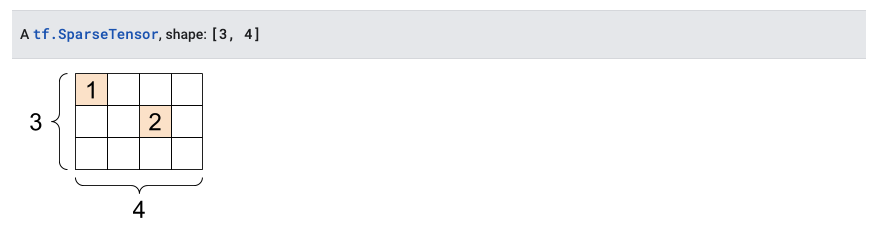

<!-- <table>
<tr>
  <th>A `tf.SparseTensor`, shape: <code>[3, 4]</code></th>
</tr>
<tr>
  <td>
<img src="images/tensor/sparse.png" alt="An 3x4 grid, with values in only two of the cells.">
  </td>
</tr>
</table> -->

In [87]:
# Sparse tensors store values by index in memory-efficient manner
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
print(sparse_tensor, '\n')

# You can convert sparse tensor to dense
print(tf.sparse.to_dense(sparse_tensor))

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64)) 

tf.Tensor(
[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 0]], shape=(3, 4), dtype=int32)


# <b> END OF DEMONSTRATION ABOUT TENSORS
    